# Titanic Dataset

## Importing Header Files

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

In [3]:
### !pip install seaborn (run if seaborn is not installed)

In [4]:
import seaborn as sns

## Reading the Datasets

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Checking for any missing datas

### 1. Train Dataset

In [9]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
missing_data = train.isnull()
missing_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

PassengerId
False    891
Name: PassengerId, dtype: int64

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



### i} Age

In [12]:
avg_age = train['Age'].astype('float').mean(axis=0)
print("Average of Age:", avg_age)

Average of Age: 29.69911764705882


In [13]:
train["Age"].replace(np.nan, avg_age, inplace=True)

### ii} Embarked

In [14]:
train['Embarked'].value_counts().idxmax()

'S'

In [15]:
train['Embarked'].replace(np.nan, 'S', inplace=True)

### iii} Cabin

In [16]:
train.dropna(subset=['Cabin'], axis=0, inplace=True)

train.reset_index(drop=True, inplace=True)

In [17]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### 2. Test Dataset

In [19]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

### i} Age

In [20]:
avg_age = test['Age'].astype('float').mean(axis=0)
print("Average of Age:", avg_age)

Average of Age: 30.272590361445783


In [21]:
test["Age"].replace(np.nan, avg_age, inplace=True)

### ii} Fare

In [22]:
avg_fare = test['Fare'].astype('float').mean(axis=0)
print("Average of Fare:", avg_fare)

Average of Fare: 35.6271884892086


In [23]:
test["Fare"].replace(np.nan, avg_fare, inplace=True)

### iii} Cabin

In [24]:
test.dropna(subset=['Cabin'], axis=0, inplace=True)

test.reset_index(drop=True, inplace=True)

In [25]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

## Data Types

### i} Train Dataset

In [26]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### ii} Test Dataset

In [27]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Plots

### 1. Fare vs Age

In [28]:
fare = train['Fare'].astype('float64')
age = train['Age'].astype('float64')
cls = train['Pclass'].astype('float64')

<BarContainer object of 204 artists>

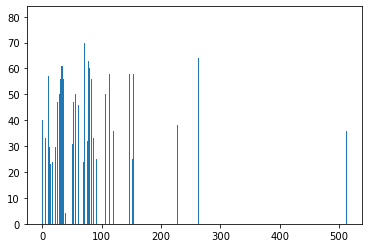

In [29]:
pyplot.bar(fare,age)

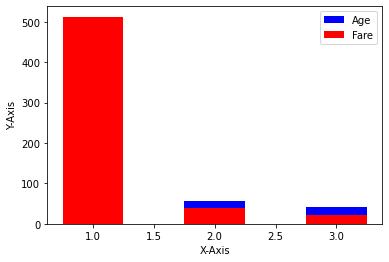

In [30]:
pyplot.bar(cls,age,label="Age",width=0.5,color='b')
pyplot.bar(cls,fare,label="Fare",width=0.5,color='r')

pyplot.xlabel('X-Axis')
pyplot.ylabel('Y-Axis')
pyplot.legend()

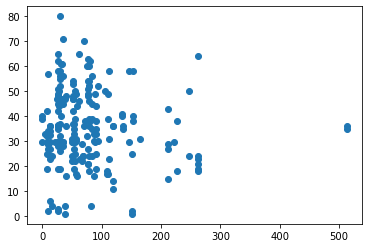

In [31]:
pyplot.scatter(fare,age)

<AxesSubplot:xlabel='Fare', ylabel='Age'>

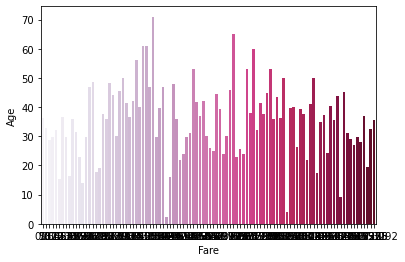

In [32]:
sns.barplot(x='Fare',y='Age',data=train,palette='PuRd',ci=None)

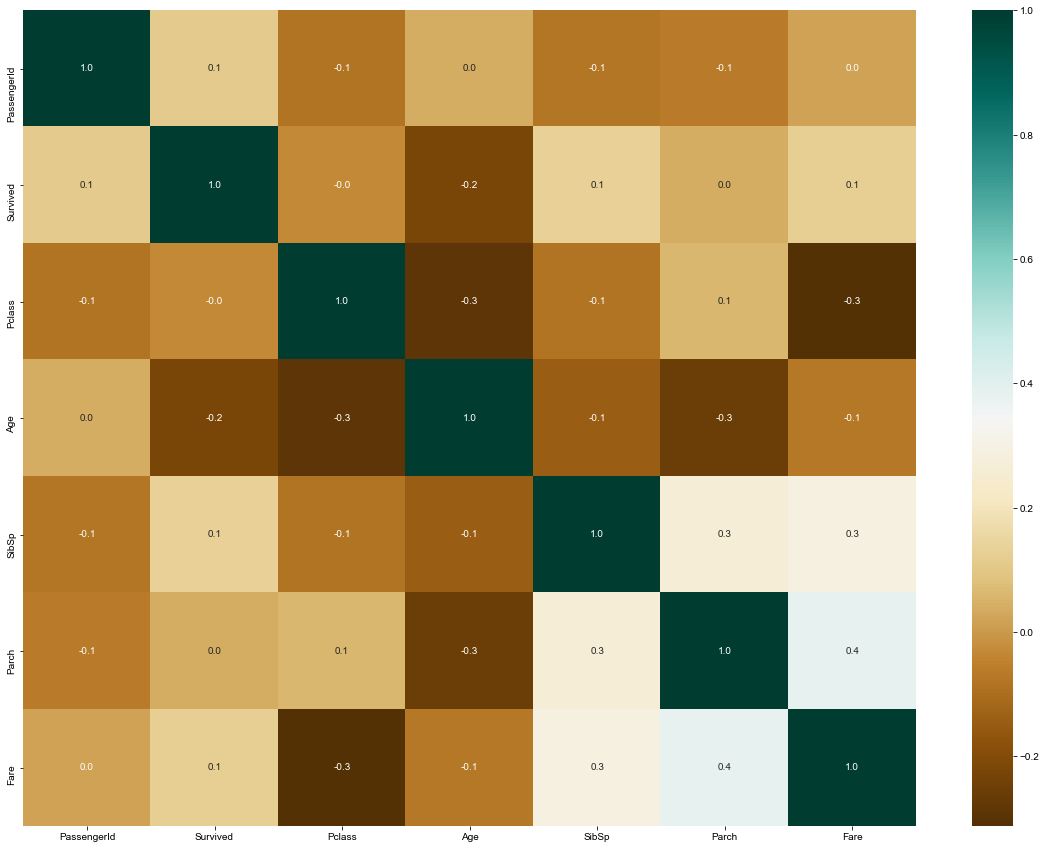

In [33]:
corr = train.corr()
f,ax = pyplot.subplots(figsize=(20, 15))
sns.heatmap(train.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
pyplot.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

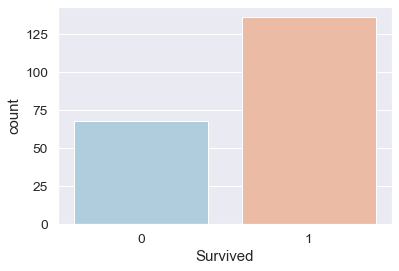

In [34]:
sns.countplot(data=train, x=train['Survived'], palette='RdBu_r')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

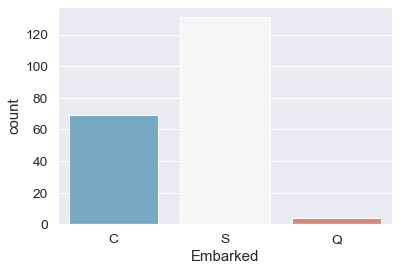

In [35]:
sns.countplot(data=train, x=train['Embarked'], palette='RdBu_r')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

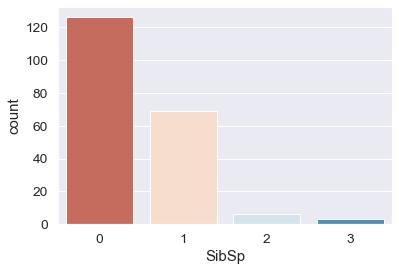

In [36]:
sns.countplot(data = train, x = train['SibSp'], palette='RdBu')

<AxesSubplot:xlabel='Survived', ylabel='count'>

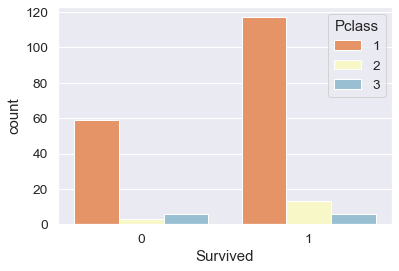

In [37]:
sns.countplot(x='Survived',data=train,hue='Pclass', palette='RdYlBu')

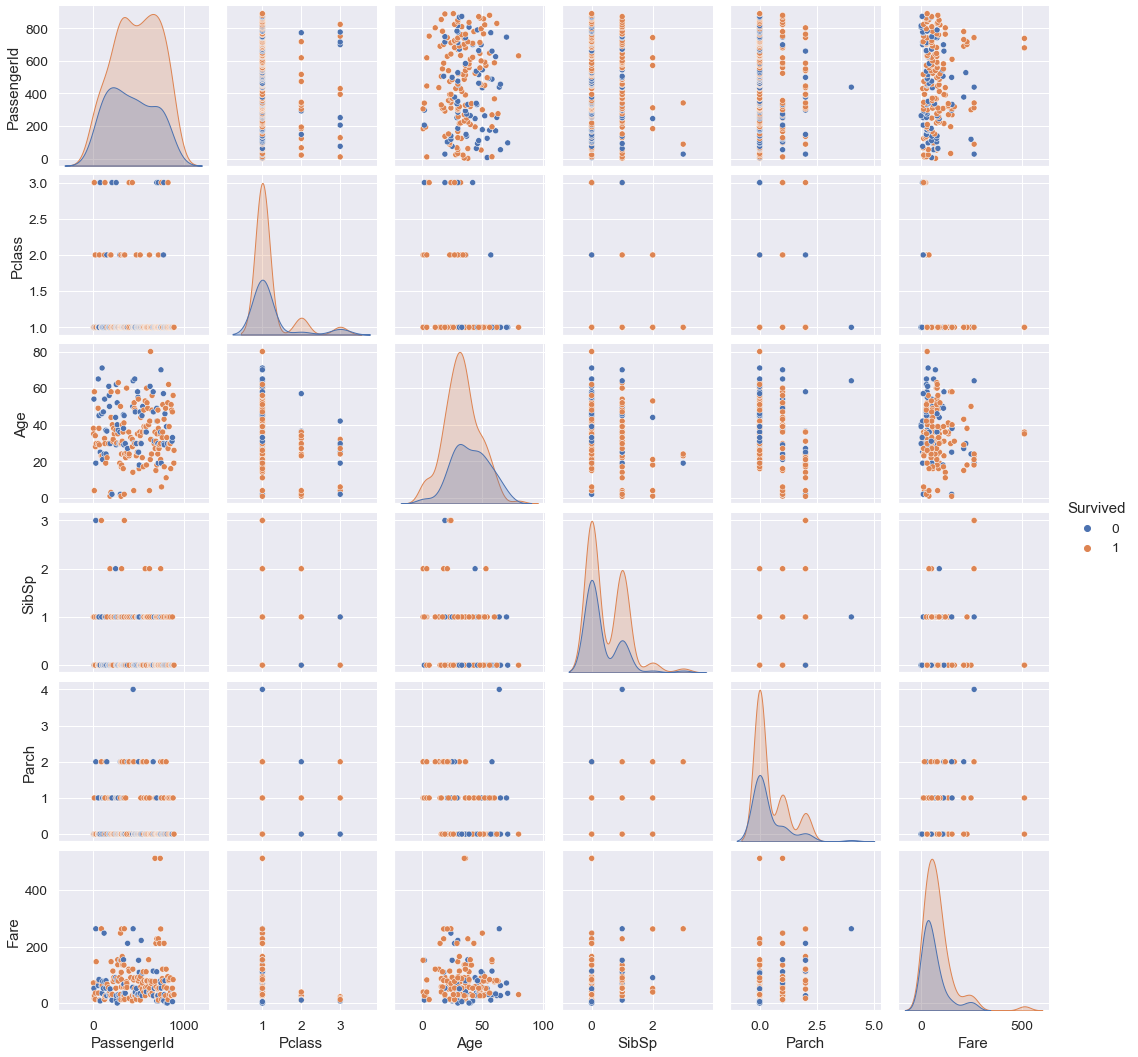

In [38]:
sns.pairplot(train,hue='Survived')

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### Training and Testing Models

In [40]:
train = train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,2,1,1,38.0,1,0,71.2833
1,4,1,1,35.0,1,0,53.1000
2,7,0,1,54.0,0,0,51.8625
3,11,1,3,4.0,1,1,16.7000
4,12,1,1,58.0,0,0,26.5500


In [42]:
from sklearn.model_selection import train_test_split as tts
y = train['Survived']
X = train.drop('Survived', axis=1)
train_X, val_X, train_y, val_y= tts(X, y, test_size=0.3, random_state=42)

In [43]:
test = test.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [44]:
from sklearn.preprocessing import StandardScaler as ss
s = ss()
s.fit(train_X)
train_X = s.transform(train_X)
val_x = s.transform(val_X)
val = s.transform(test)

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression as lr

l_model = lr()
l_model.fit(train_X, train_y)
y_pred = l_model.predict(val_X)

In [46]:
param = l_model.get_params()
pd.DataFrame(data=param, index=[0])

,C,class_weight,dual,fit_intercept,intercept_scaling,l1_ratio,max_iter,multi_class,n_jobs,penalty,random_state,solver,tol,verbose,warm_start
0,1.0,None,False,True,1,None,100,auto,None,l2,None,lbfgs,0.0001,0,False


## Model Evaluation

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
accuracy_score(val_y, y_pred)

0.7258064516129032

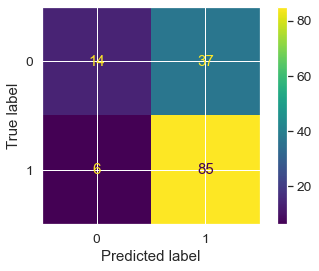

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(l_model, train_X, train_y)

In [49]:
print(classification_report(val_y, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.06      0.11        17
           1       0.73      0.98      0.84        45

    accuracy                           0.73        62
   macro avg       0.62      0.52      0.47        62
weighted avg       0.67      0.73      0.64        62



In [50]:
y_test_pred= l_model.predict(test)
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,904,1,23.0,1,0,82.2667
1,906,1,47.0,1,0,61.1750
2,916,1,48.0,1,3,262.3750
3,918,1,22.0,0,1,61.9792
4,920,1,41.0,0,0,30.5000
...,...,...,...,...,...,...
86,1296,1,43.0,1,0,27.7208
87,1297,2,20.0,0,0,13.8625
88,1299,1,50.0,1,1,211.5000
89,1303,1,37.0,1,0,90.0000
